Perkenalan
1. Nama: Muhammmad Zukri Al Walidani
2. Batch: 007

Data berikut merupakan kumpulan umur manusia yang tersebar dari 223 negara dan 6 benua di dunia. Kita ingin Melihat bagaimana persebaran data, negara mana yang paling memiliki penduduk dengan usia terlama dan negara mana yang memiliki penduduk dengan umur terpendek. Umur merupakan salah satu indikator dalam kesejahteraan, semakin panjang umur penduduknya maka makin sejahtera negara tersebut.

import pustaka

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.cluster import k_means



Data Loading

In [183]:
df = pd.read_csv('Life_expectancy_dataset.csv', encoding = 'ISO-8859-1')
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [184]:
df.tail()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa
222,223,Chad,50.2,49.0,51.3,Africa


In [185]:
df.describe()

,Rank,Overall Life,Male Life,Female Life
count,223.000000,223.000000,223.000000,223.000000
mean,112.000000,72.487892,70.041704,75.019283
std,64.518731,8.459335,8.074942,8.986633
min,1.000000,50.200000,48.600000,51.000000
25%,56.500000,67.450000,64.500000,69.750000
50%,112.000000,74.900000,72.200000,77.900000
75%,167.500000,78.600000,75.850000,81.600000
max,223.000000,89.500000,85.600000,93.500000


insight:
Data terdistribusi normal

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


insight: data tidak memiliki missing value

Exploratory Data Analysis (EDA)

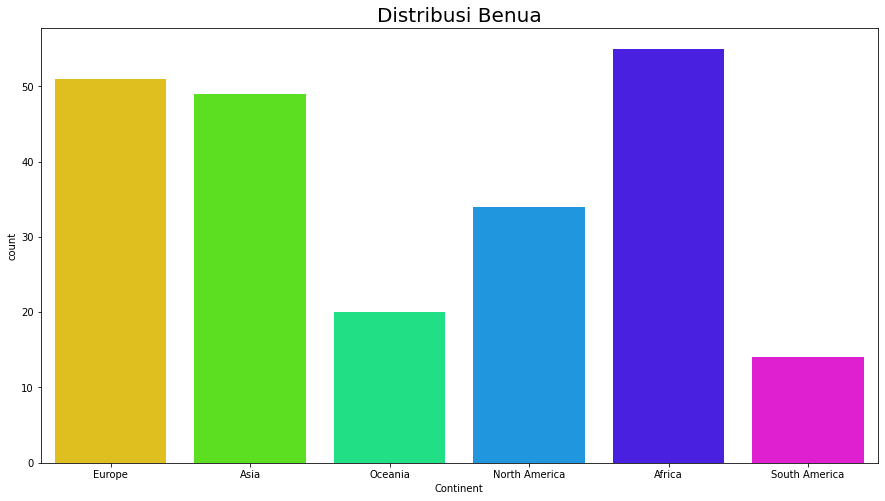

In [187]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Continent'], palette = 'hsv')
plt.title('Distribusi Benua', fontsize = 20)
plt.show()

insight: 
1. Data Didominasi oleh benua afrika disusul eropa, asia, amerika utara, amerika selatan, dan oceania
2. negara dengan jumlah peenduduk yang banyak bekum tentu yang memiliki kesejahteraan yang paling baik

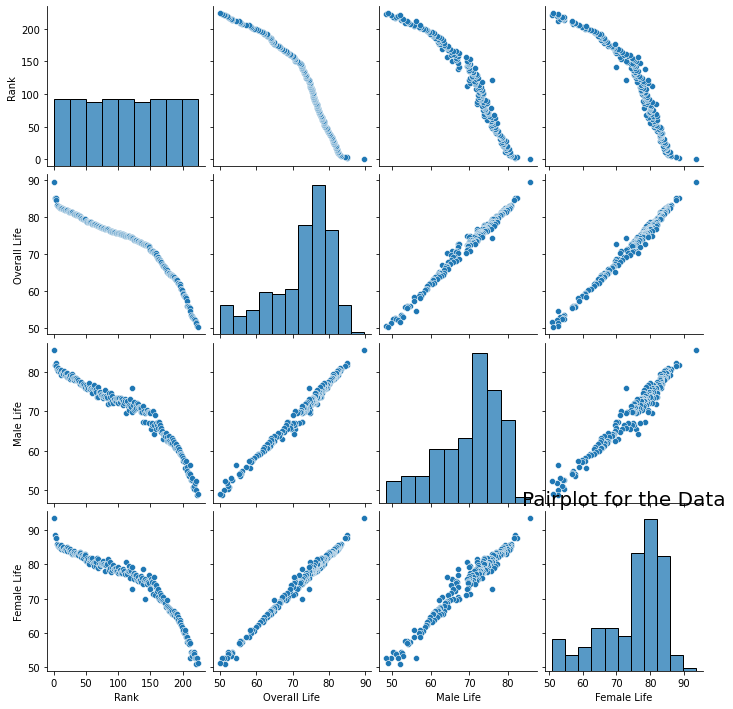

In [188]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

insight:
1. Terdapat 223 negara dalam data tersebut.
2. Usia penduduk di ukur dari 50 hingga 89 tahun
3. Persebaran usia pria dan wanita tidak jauh berbeda atau cenderung sama
4. Rank ditunjukkan dengan data ordinal, dimana semakin mendekati satu maka semakin lama usia, dan begitu sebaliknya.

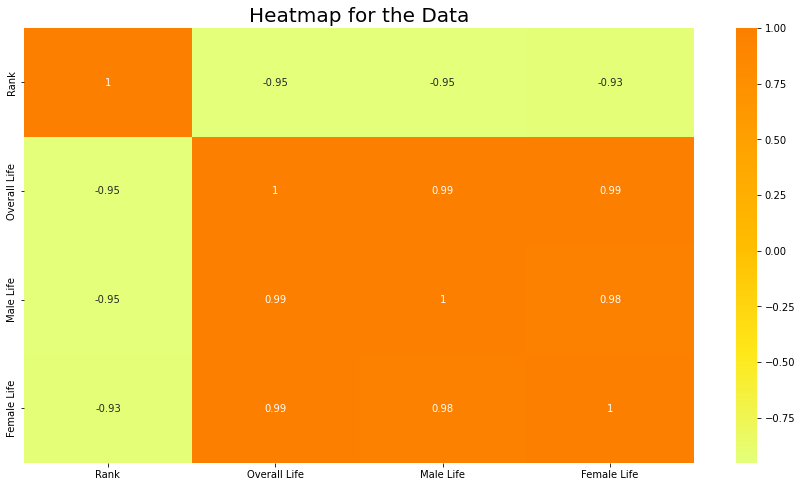

In [189]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

insight:
1. Varibabel-variabel berhubungan secara signifikan dengan dirinya sendiri
2. varibel lain juga berkorelasi secara signifikan antar satu sama lain.

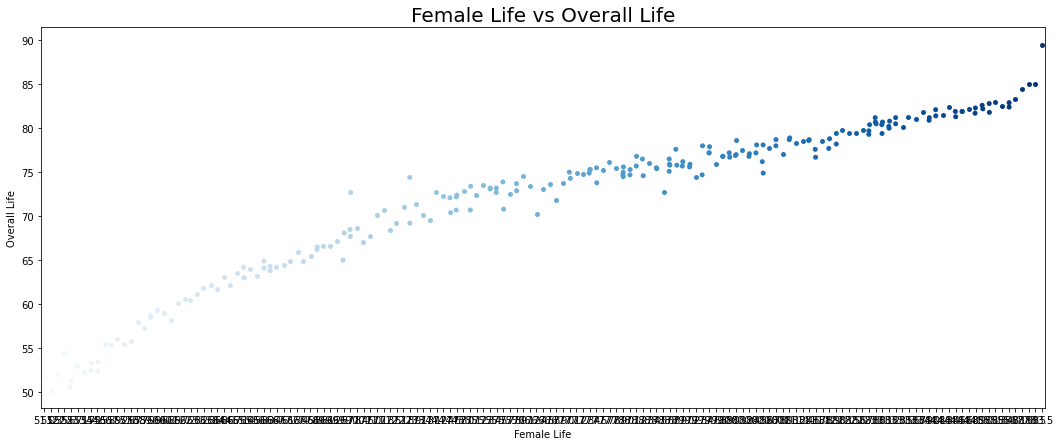

In [190]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df['Female Life'], df['Overall Life'], palette = 'Blues')
plt.title('Female Life vs Overall Life', fontsize = 20)
plt.show()

insight: persebaran data usia wanita semakin semakin mendekati usia 90 tahun semakin banyak pula datanya

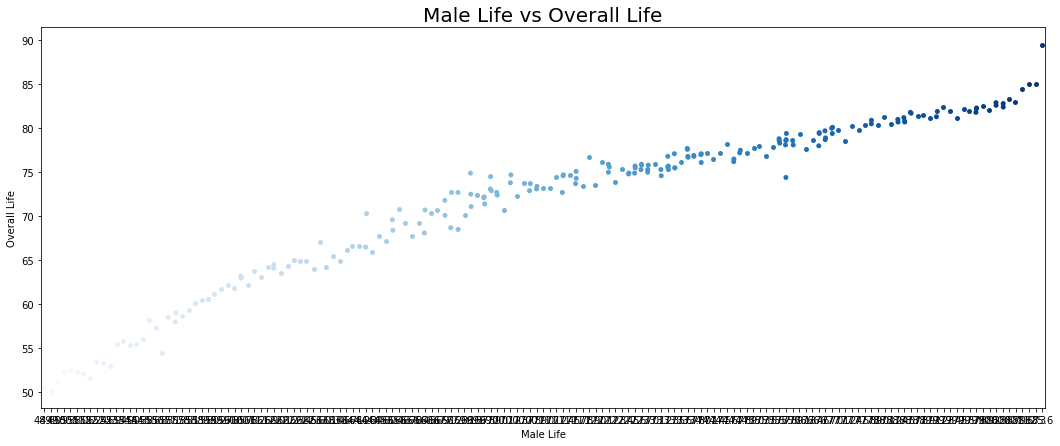

In [191]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df['Male Life'], df['Overall Life'], palette = 'Blues')
plt.title('Male Life vs Overall Life', fontsize = 20)
plt.show()

insight: persebaran data usia pria semakin semakin mendekati usia 90 tahun semakin banyak pula datanya

Data preprocessing

In [192]:
#mengubah data kategori mendjadi numerik
continent_dict={'Europe':1,'Asia':2,'Oceania':3,'North America':4,'Africa':5,'South America':6}
df['Continent']= df['Continent'].map(continent_dict) 


In [193]:
df.Continent.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 10.6+ KB


In [195]:
X = df

y = df['Continent']

In [196]:
#menghapus kolom country karena terlalu banyak variabel
X.drop('Country', axis=1, inplace=True)

In [197]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Continent'] = le.fit_transform(X['Continent'])

y = le.transform(y)

In [198]:
X.head()

,Rank,Overall Life,Male Life,Female Life,Continent
0,1,89.5,85.6,93.5,0
1,2,85.0,81.7,88.5,1
2,3,85.0,82.3,87.8,1
3,4,84.5,81.6,87.6,1
4,5,83.3,80.7,86.1,0


In [199]:
cols = X.columns

In [200]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [201]:
X = pd.DataFrame(X, columns=[cols])

In [202]:
X.head()

,Rank,Overall Life,Male Life,Female Life,Continent
0,0.000000,1.000000,1.000000,1.000000,0.0
1,0.004505,0.885496,0.894595,0.882353,0.2
2,0.009009,0.885496,0.910811,0.865882,0.2
3,0.013514,0.872774,0.891892,0.861176,0.2
4,0.018018,0.842239,0.867568,0.825882,0.0


Model Definition

In [219]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [204]:
kmeans.cluster_centers_

array([[0.84566875, 0.28968487, 0.30316008, 0.29252489, 0.73538462],
       [0.3577945 , 0.68125745, 0.69319193, 0.67731943, 0.30632911]])

In [205]:
kmeans.inertia_

34.310360901300456

Model Training

In [206]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 44 out of 223 samples were correctly labeled.


In [207]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.20


Model Evaluation

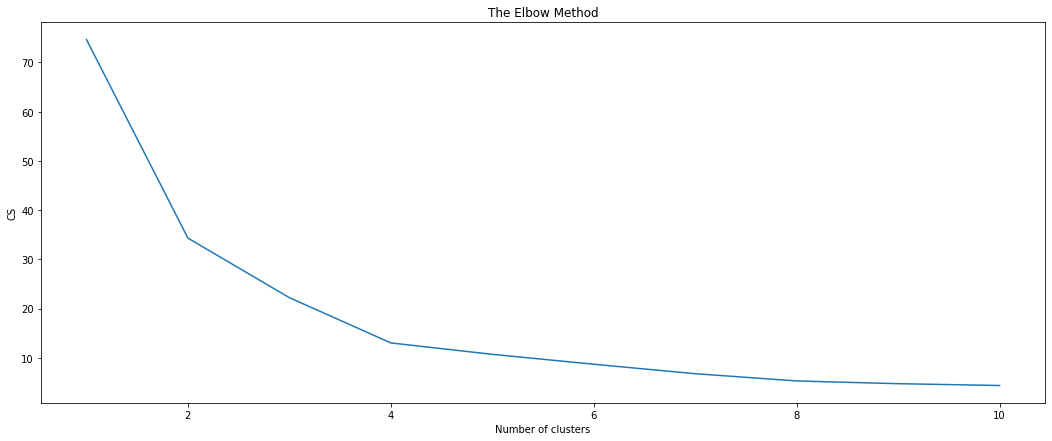

In [208]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Elbow menunjukkan bahwa cluster terbaik adalah 2

In [209]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 16 out of 223 samples were correctly labeled.
Accuracy score: 0.07


Percobaan menggunakan Cluster lain

In [210]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 80 out of 223 samples were correctly labeled.
Accuracy score: 0.36


Terlihat bahwa culster yang terbaik dalah dengan jumlah 5

In [211]:
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 78 out of 223 samples were correctly labeled.
Accuracy score: 0.35


In [212]:
kmeans = KMeans(n_clusters=7, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 16 out of 223 samples were correctly labeled.
Accuracy score: 0.07


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Overall Life  223 non-null    float64
 2   Male Life     223 non-null    float64
 3   Female Life   223 non-null    float64
 4   Continent     223 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 8.8 KB


In [214]:
pca =  PCA(n_components= 2).fit(df)

In [215]:
df_pca = pd.DataFrame(pca.transform(df))

In [217]:
pcs = ['pc'+str(i+1) for i in range(2)]

KESIMPULAN:
1. Negara dengan umur yang paling panjang adalah negara MOnaco
2. Negara dengan umur terpendek menurut data adalah negara Chad. 
3. Tidak terdapat perbedaan yang jauh antara umur pria dan wanita
4. Varibel saling berkorelasi secara seginifikan
5. Data di dominasi oleh penduduk dari benua afrika, namun belum tentu negara dengan jumlah terbanyak maka umurnya lebih panjang pula.
5. Dari model K-Means yang telah dibuat, didapatkan hasil elbow dengan 2 sebagai jumlah cluster terbaiknya
6. Setelah dilakukan percobaan menggunakan cluster lain ternyata 5 cluster memiliki nilai atau accuracy yang lebih tinggi yaitu 0.36 dibandingkan dengan elbow accuracy yang hanya 0.20
7. Umur merupakan salah satu indikator kesejahteraan masayrakat, semakin panjang umurnya maka akan berarti penduduknya semakin sejahtera.